# Importing Data Using Pandas - Lab

## Introduction

In this lab, you'll get some practice with loading files with summary or metadata, and if you find that easy, the optional "level up" content covers loading data from a corrupted csv file!

## Objectives
You will be able to:
* Import data from csv files and Excel files
* Understand and explain key arguments for imports
* Save information to csv and Excel files
* Access data within a Pandas DataFrame (print() and .head())

##  Loading Files with Summary or Meta Data

Load either of the files Zipcode_Demos.csv or Zipcode_Demos.xlsx. What's going on with this dataset? Clean it up into a useable format and describe the nuances of how the data is currently formatted.

All data files are stored in a folder titled 'Data'.

In [107]:
# Your code here - Load the file
import pandas as pd
df = pd.read_csv("Data/Zipcode_Demos.csv", header = 47)
import matplotlib.pyplot as plt

In [120]:
# Your code here - Perform exploratory data analysis
df

,47,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,COUNT HISPANIC LATINO,...,COUNT US CITIZEN,PERCENT US CITIZEN,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,48,10001,44,22,0.50,22,0.50,44,100,16,...,42,0.95,44,100,20,0.45,24,0.55,44,100
1,49,10002,35,19,0.54,16,0.46,35,100,1,...,33,0.94,35,100,2,0.06,33,0.94,35,100
2,50,10003,1,1,1.00,0,0.00,1,100,0,...,1,1.00,1,100,0,0.00,1,1.00,1,100
4,52,10005,2,2,1.00,0,0.00,2,100,0,...,1,0.50,2,100,0,0.00,2,1.00,2,100
5,53,10006,6,2,0.33,4,0.67,6,100,2,...,6,1.00,6,100,0,0.00,6,1.00,6,100
6,54,10007,1,0,0.00,1,1.00,1,100,0,...,1,1.00,1,100,1,1.00,0,0.00,1,100
7,55,10009,2,0,0.00,2,1.00,2,100,0,...,2,1.00,2,100,0,0.00,2,1.00,2,100
9,57,10011,3,2,0.67,1,0.33,3,100,1,...,3,1.00,3,100,0,0.00,3,1.00,3,100


In [ ]:
# What is going on with this data set? Anything unusual?

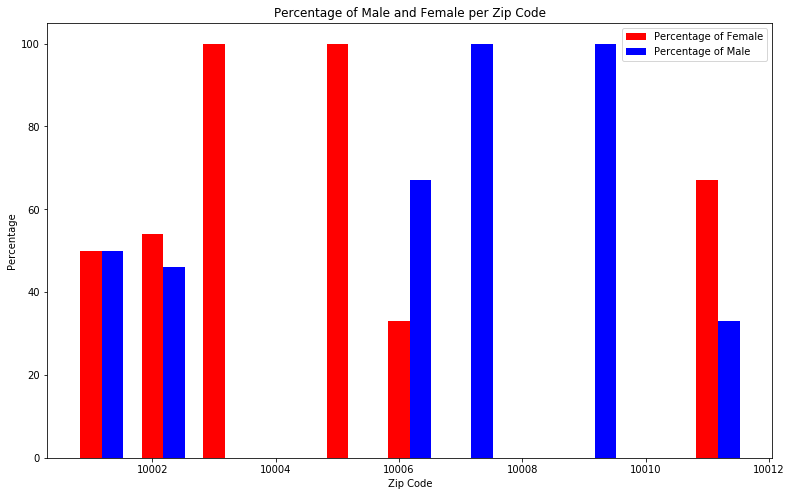

In [122]:
# Your code here - Clean up the data set
df_column_values = {}
for column in df:
    value = df[column].sum()
    df_column_values[column] = value
for key in df_column_values.keys():
    if df_column_values.get(key) == 0:
        df = df.drop(columns = key)
    else:
        continue
df = df.loc[df["COUNT PARTICIPANTS"] > 0]

fem_percent = df["PERCENT FEMALE"] * 100
male_percent = df["PERCENT MALE"] * 100
x_values = df["JURISDICTION NAME"]

plt.figure(figsize = (13,8))
plt.bar(x_values, fem_percent, 0.35, label = "Percentage of Female", color = 'Red')
plt.bar(x_values + 0.35, male_percent, 0.35, label = "Percentage of Male", color = 'Blue')
plt.ylabel("Percentage")
plt.xlabel("Zip Code")
plt.title("Percentage of Male and Female per Zip Code")
plt.legend()
plt.show()

## Level Up (Optional) - Loading Corrupt CSV files

Occasionally, you encounter some really ill formatted data. One example of this can be data that has strings containing commas in a csv file. Under the standard protocol, when this occurs, one is supposed to use quotes to differentiate between the commas denoting fields and commas within those fields themselves. For example, we could have a table like this:  

ReviewerID,Rating,N_reviews,Review,VenueID
123456,4,137,This restaurant was pretty good, we had a great time.,98765

Which should be saved like this if it were a csv (to avoid confusion with the commas in the Review text):
"ReviewerID","Rating","N_reviews","Review","VenueID"
"123456","4","137","This restaurant was pretty good, we had a great time.","98765"

Attempt to import the corrupt file, or at least a small preview of it. It is appropriately titled Yelp_Reviews_corrupt.csv. Investigate some of the intricacies of skipping rows to then pass over this error and comment on what you think is going on.

In [ ]:
#Hint: here's a useful programming pattern to use.
try:
    #do something
except Exception as e:
    #handle your exception e

## Summary

Congratulations, you now practiced your pandas-importing skills!